### All of Statistics - Chapter 8 Exercise 7
Let $X_1,...,X_n \sim Uniform(0, \theta).$ Let $\hat\theta = X_{max} = \max(X_1,...,X_n).$ Generate a data set of size 50 with $\theta = 1$. <br>
(a) Find the distribution of $\hat\theta.$ Compare the true distribution of $\hat\theta$ to the histograms from the bootstrap.

In [1]:
n = 50
B = 2000
x <- runif(n, min = 0, max = 1)

#### 1. Construct Estimator

In [3]:
get_max <- function(data) {
    return(max(data))
}

#### 2. Bootstrap Resampling

In [5]:
retheta <- numeric(B)
for (b in 1:B) {
    re_x <- sample(x, size = n, replace = TRUE)
    retheta[b] <- get_max(re_x)
}

#### 3. Construct Confidence Interval

In [10]:
alpha = 0.05
theta <- max(x)
est_se <- sqrt(var(retheta))
q_low <- quantile(retheta, probs = alpha/2)
q_high <- quantile(retheta, probs = 1-(alpha/2))

In [11]:
print(paste0("The estimated s.e = ", round(est_se, 3)))

[1] "The estimated s.e = 0.04"


In [12]:
norm_ci <- c(theta-qnorm(1-(alpha/2))*est_se, theta+qnorm(1-(alpha/2))*est_se)
pivotal_ci <- c(2*theta-q_high, 2*theta-q_low)
percentile_ci <- c(q_low, q_high)

In [13]:
print(paste0("Normal Interval = (", round(norm_ci[1], 3), ", ", round(norm_ci[2], 3), ")"))
print(paste0("Pivotal Interval = (", round(pivotal_ci[1], 3), ", ", round(pivotal_ci[2], 3), ")"))
print(paste0("Quantile Interval = (", round(percentile_ci[1], 3), ", ", round(percentile_ci[2], 3), ")"))

[1] "Normal Interval = (0.883, 1.038)"
[1] "Pivotal Interval = (0.96, 1.069)"
[1] "Quantile Interval = (0.852, 0.96)"


#### 4. True Sampling Distribution

In [30]:
true_theta <- numeric(5000)
for (b in 1:5000) {
    data <- runif(n, min = 0, max = 1)
    true_theta[b] <- get_max(data)
}

#### 4. Comparison

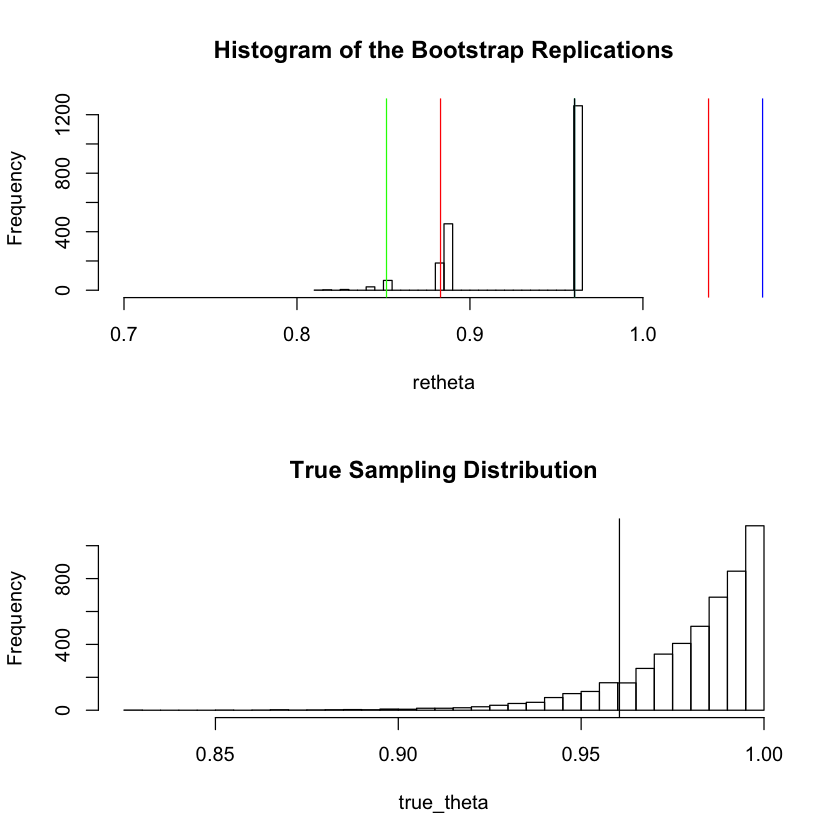

In [31]:
par(mfrow=c(2,1))    # set the plotting area into a 1*2 array
hist(retheta, 
     breaks = 40, 
     main = "Histogram of the Bootstrap Replications", 
     xlim = c(0.7,1.07))
abline(v = norm_ci, col = "red")
abline(v = pivotal_ci, col = "blue")
abline(v = percentile_ci, col = "green")
abline(v = theta, col = "black")
hist(true_theta, breaks = 50, main = "True Sampling Distribution")
abline(v = theta, col = "black")

* This is a case where the bootstrap does poorly
* The poor estimation comes from the fact that the estimated distribution of the data does not resemble the true distribution